# Deep Learning Problem Set

## Part I Math Problems

- Converted as PDF for submission for problem subset 1.1, 1.2.1, and 1.2.2

### 1.1 Vanishing Gradient

Reference:
- https://www.jefkine.com/general/2018/05/21/2018-05-21-vanishing-and-exploding-gradient-problems/

#### 1.1.1

The cumulative loss $\varepsilon$ can be expressed by $\varepsilon = \sum_{t = 1}^{T} \varepsilon_{t}$, where the term $\varepsilon_{t}$ is the loss at each time step $t$. To show the gradient of the overall loss $\frac{\partial \varepsilon}{\partial \theta}$ in terms of each $\varepsilon_{t}$, take derivative w.r.t $\theta$ which yields to:

\begin{equation}\tag{1.1-1}
\frac{\partial \varepsilon}{\partial \theta} =  \sum_{t = 1}^{T} \frac{\partial \varepsilon_{t}}{\partial \theta}
\end{equation}

#### 1.1.2

Denoted function $l$ to be the loss function of recurrent neural network model; also let function $g$ maps the hidden state $x_{t}$ to predictions $\hat{y_{t}}$ (i.e. $\hat{y_{t}} = g(x_{t}$). Let the true responses denoted as $y_{t}$ accordingly, for any time step $t$. With the expression (1.1-1) as above, the overall loss $\frac{\partial \varepsilon}{\partial \theta}$ can then be expressed as:

\begin{equation}\tag{1.1-2}
\frac{\partial \varepsilon}{\partial \theta} =  \sum_{t = 1}^{T} \frac{\partial \varepsilon_{t}}{\partial \theta} = \sum_{t = 1}^{T} \frac{\partial l(y_{t} - \hat{y_{t}})  }{\partial \theta}
\end{equation}

where $\varepsilon_{t} = l(y_{t} - \hat{y_{t}})$. Since $y_{t}$ is the true responses, it's invariant with $\theta$, that is, $\frac{\partial y_{t}}{\partial \theta} = 0$. Thus, $\frac{\partial \varepsilon}{\partial \theta}$ can further be expressed by:

\begin{equation}\tag{1.1-3}
\frac{\partial \varepsilon}{\partial \theta}  = \sum_{t = 1}^{T} \frac{\partial l  }{\partial (y_{t} - \hat{y_{t}})}\frac{\partial (y_{t} - \hat{y_{t}})}{\partial \theta} = - \sum_{t = 1}^{T} \frac{\partial l  }{\partial (y_{t} - \hat{y_{t}})}\frac{\partial f(x_{t})}{\partial \theta}
\end{equation}

Apply chain rule to the results above:

\begin{equation*}\tag{1.1-4}
\frac{\partial \varepsilon}{\partial \theta}  = - \sum_{t = 1}^{T} \frac{\partial l  }{\partial (y_{t} - \hat{y_{t}})}\frac{\partial f}{\partial x_{t}}\frac{\partial x_{t}}{\partial \theta} = - \sum_{t = 1}^{T} \frac{\partial l  }{\partial (y_{t} - \hat{y_{t}})}\frac{\partial f}{\partial x_{t}}\frac{\partial x_{t}}{\partial x_{k}}\frac{\partial x_{k}}{\partial \theta}
\end{equation*}

for hidden state $x_k$ at a timepoint k < t. 


#### 1.1.3

Based on the given hint, take the derivative w.r.t $x_{t-1}$ on equation of $x_{t}$: 

\begin{equation}\tag{1.1-5}
\frac{\partial x_{t}}{\partial x_{t-1}} = W_{rec}\frac{\partial \sigma(x_{t-1})}{\partial x_{t-1}} + W_{in}\frac{\partial u_{t}}{\partial x_{t-1}} + \frac{\partial b}{\partial x_{t-1}} =  W_{rec}\frac{\partial \sigma(x_{t-1})}{\partial x_{t-1}}
\end{equation}

as the last two terms goes 0. This term involves products of Jacobians $\frac{\partial x_{t}}{\partial x_{t-1}}$ over subsequences linking an event at time t and one at time k given by:

\begin{equation}\tag{1.1-6}
\frac{\partial x_{t}}{\partial x_{k}} = \frac{\partial x_{t}}{\partial x_{t-1}}\frac{\partial x_{t-1}}{\partial x_{t-2}} ... \frac{\partial x_{k+2}}{\partial x_{k+1}}\frac{\partial x_{k+1}}{\partial x_{k}} = (W_{rec})^{t-k}\Pi_{i = t-k}^{t}\frac{\partial  \sigma(x_{i})}{\partial x_{i}}
\end{equation}

#### 1.1.4

Consider the inequality of the norms associated with these above Jacobians:

\begin{equation}\tag{1.1-7}
||\frac{\partial x_{i}}{\partial x_{i-1}}|| \le || W_{rec}|| \  ||\frac{\sigma(\partial x_{i-1})}{\partial x_{i-1}}|| 
\end{equation}

Assuming $\lambda_{max}$ to be the largest eigenvalue of $|| W_{rec}||$. Since $\frac{\sigma(\partial x_{i-1})}{\partial x_{i-1}}$ is bounded by $\gamma$, if: 

\begin{equation}\tag{1-1.8 - assumption}
\lambda_{max} < \frac{1}{\gamma}
\end{equation}
then the above equation (1.1-7) is bounded by: $(\frac{1}{\gamma})\gamma = 1$. And we have:

\begin{equation}\tag{1-1.9}
||\frac{\partial x_{i}}{\partial x_{i-1}}|| < 1    
\end{equation}

From the above equation (1-1.9), as the rates of iteration of consecutive hidden states are less than 1, the gradient is gradually vanishing towards 0. Thus, it's concluded that the assumption 1-1.8 $\lambda_{max} < \frac{1}{\gamma}$ is sufficient to experience the vanishing gradient problem. 

We can then express the norm of the term $||\frac{\partial x_{t}}{\partial x_{k}}||$ based on equation (1.1-6) as:

\begin{equation}\tag{1-1.10}
||\frac{\partial x_{t}}{\partial x_{k}}|| \le ||(W_{rec})^{t-k}|| \ ||\Pi_{i = t-k}^{t}\frac{\partial  \sigma(x_{i})}{\partial x_{i}}|| < ||\lambda_{max}|| \ ||\Pi_{i = t-k}^{t}\frac{\partial  \sigma(x_{i})}{\partial x_{i}}||
\end{equation}

Notice that $\lambda_{max} < 1$, then as $t-k \rightarrow \infty$: 

\begin{equation}\tag{1.1-11}
||\frac{\partial x_{t}}{\partial x_{k}}|| \approx 0 
\end{equation}

#### 1.1.5

- From part 1.1.4, vanishing gradient is guaranteed with the largest eigenvalue of $W_{rec}$ < $\frac{1}{\gamma}$. 

- In contrast to the above statement, exploding gradient is guaranteed if the largest eigenvalue of $W_{rec}$ > $\frac{1}{\gamma}$.

- One method to counteract vanishing gradient issue is by implementing the Long Short Term Memory (LSTM) model in RNN. 

- One method to counteract exploding gradient issue is by implementing the Truncated Back propagation Through Time (TBPTT) model in RNN. 

### 1.2 Optimizers

- f(x) = x$^2$ + 6$y^2$ + xy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.2.1 

- Produce a contour plot of f(x), and indicate the coordinates of the global minimum of f(x).

In [2]:
# define the pseudo-loss function 

def loss(x, y):
    return x**2 + 6*y**2 + x*y

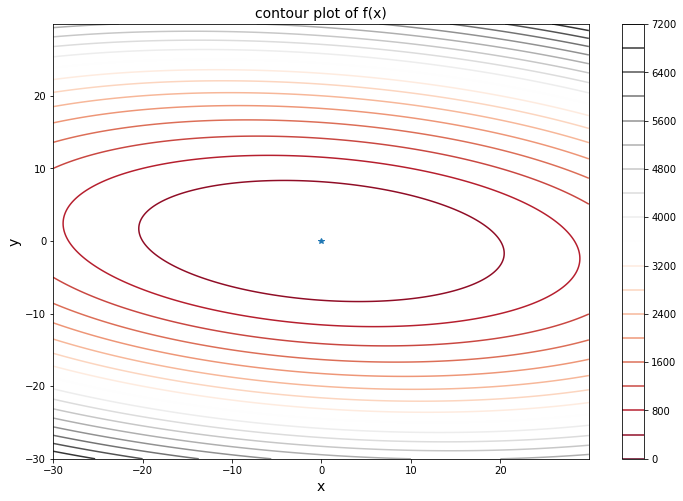

In [3]:
# contour plot of f(x)

plt.figure(figsize=(12, 8))
x = np.arange(-30, 30, 0.1)
y = np.arange(-30, 30, 0.1)
X, Y = np.meshgrid(x, y)
Z = loss(X, Y)

plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.plot(0, 0, marker='*')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title("contour plot of f(x)", fontsize=14)
plt.colorbar()
plt.show()

**Summary**: the minimum point (shown as a **star**) was located at (0, 0).

#### 1.2.2 
- Initialize the “weights” x and y as (x,y) = 4,1. Show the math and results for **three iterations** of stochastic gradient descent (α = 0.05) and SGD with Nesterov’s accelerated gradient (initialize velocities as 0, (α = 0.9), (α = 0.05). Calculate the gradient symbolically (differentiate f using calculus rules).

The object pseudo loss function is $f(x,y) = x ^{2} + 6y^{2} + xy$. By taking te derivative w.r.t x and y:

\begin{equation}\tag{1.2-1}
\begin{pmatrix} \frac{\partial}{\partial x} \\ \frac{\partial}{\partial y} \end{pmatrix}  f(x, y)  = \begin{pmatrix} 2x + y \\ x + 12y \end{pmatrix}
\end{equation}

**Classical Gradient Descent Iterations**:

Since in this framework of problem, the term "stochastic" does not really apply as there is no data involved - we have a closed form for the loss vs. the parameters. In replace, by choose a constant learning rate $\alpha$ = 0.05, and initial point $(x, y) = (4, 1)$, updated steps are: 

\begin{equation}\tag{1.2-2-GD-iter1}
\begin{pmatrix} x_{1} \\ y_{1} \end{pmatrix} = \begin{pmatrix} x_{0} \\ y_{0} \end{pmatrix} - \alpha\begin{pmatrix} 2x_{0} + y_{0} \\ x_{0} + 12y_{0}\end{pmatrix}  \\
= \begin{pmatrix}4 \\1 \end{pmatrix} - (0.05)\begin{pmatrix} 9 \\ 16 \end{pmatrix} = \begin{pmatrix} 3.55 \\ 0.2 \end{pmatrix}
\end{equation}

\begin{equation*}\tag{1.2-3-GD-iter-2}
\begin{pmatrix} x_{2} \\ y_{2} \end{pmatrix} = \begin{pmatrix} x_{1} \\ y_{1} \end{pmatrix} - \alpha\begin{pmatrix} 2x_{1} + y_{1} \\ x_{1} + 12y_{1}\end{pmatrix}  \\ 
= \begin{pmatrix}3.55 \\0.2 \end{pmatrix} - (0.05)\begin{pmatrix} 7.3 \\ 5.95 \end{pmatrix} = \begin{pmatrix} 3.185 \\ -0.0975 \end{pmatrix}
\end{equation*}

\begin{equation*}\tag{1.2-4-GD-iter-3}
\begin{pmatrix} x_{3} \\ y_{3} \end{pmatrix} = \begin{pmatrix} x_{2} \\ y_{2} \end{pmatrix} - \alpha\begin{pmatrix} 2x_{2} + y_{2} \\ x_{2} + 12y_{2}\end{pmatrix}  \\
= \begin{pmatrix}3.185 \\ -0.0975 \end{pmatrix} - (0.05)\begin{pmatrix} 6.2725 \\ 2.015 \end{pmatrix} \approx \begin{pmatrix} 2.8714 \\ -0.1982\end{pmatrix}
\end{equation*}

**Nesterov’s accelerated gradient (NAG) Iterations**:

Let $\theta_{t} = \begin{pmatrix} x_{t} \\ y_{t} \end{pmatrix}$, the framework of NAG algorithm is:

\begin{equation}\tag{1.2-5}
v_{t + 1} = \mu v_{t} - \alpha\nabla f(\theta_{t} + \mu v_{t})
\end{equation}

\begin{equation}\tag{1.2-6}
\theta_{t+1} = \theta_{t} + v_{t + 1}
\end{equation}

Given the same initial setting as above, plus the momentum coefficient $μ= 0.9$ and the initial velocity $v_0= 0$, updated steps are:

\begin{equation}\tag{1.2-7-NAG-iter-1}
v_{1} = \mu v_{0} - \alpha\nabla f(\theta_{0} + \mu v_{0}) = - \alpha\nabla f(\theta_{0})
\end{equation}

\begin{equation}
\theta_{1} = \theta_{0} + v_{1}  = \theta_{0} - \alpha\nabla f(\theta_{0}) =  \begin{pmatrix} 3.55 \\ 0.2 \end{pmatrix}
\end{equation}

(Note: above step same as Gradient Descent iter 1).

\begin{equation}\tag{1.2-8-NAG-iter-2}
v_{2} = \mu v_{1} - \alpha\nabla f(\theta_{1} + \mu v_{1}) = \begin{pmatrix} -0.6935 \\ -0.5625 \end{pmatrix} 
\end{equation}

\begin{equation}
\theta_{2} = \theta_{1} + v_{2} = \begin{pmatrix} 3.55 \\ 0.2 \end{pmatrix} + \begin{pmatrix} -0.6935 \\ -0.5625 \end{pmatrix}  \\
= \begin{pmatrix} 2.8565 \\ -0.5625 \end{pmatrix} 
\end{equation}

\begin{equation}\tag{1.2-9-NAG-iter-3}
v_{3} = \mu v_{2} - \alpha\nabla f(\theta_{2} + \mu v_{2}) \approx \begin{pmatrix} -0.8037 \\ -0.0960\end{pmatrix} 
\end{equation}

\begin{equation}
 \begin{pmatrix} x_{3} \\ y_{3} \end{pmatrix} = \theta_{3} = \theta_{2} + v_{3} = \begin{pmatrix} 2.8565 \\ -0.5625 \end{pmatrix} + \begin{pmatrix} -0.8037 \\ -0.0960 \end{pmatrix} \\
 \approx \begin{pmatrix} 2.0528 \\ -0.4612 \end{pmatrix} 
\end{equation}